In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import os
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# folder_path="/content/drive/MyDrive/current/ML-project/dataTop/5_image/"
folder_path="/content/drive/MyDrive/ML-project/dataTop5_image/"
na_class=os.listdir(folder_path)
print(na_class)

['comrav', 'houspa', 'houwre', 'redcro', 'sonspa']


In [4]:
X=[]
Y=[]
image_size=226
i=0
for cl in na_class:
  clpath=folder_path+cl
  names=os.listdir(clpath)
  for n in names:
    rpath=clpath+"/"+n
    img=cv2.imread(rpath,0)
    img=cv2.resize(img, (image_size, image_size))
    X.append(img)
    Y.append(i)
  i+=1
X=np.asarray(X)
Y=np.asarray(Y)
  # print(names)
  # break

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=12)
number_of_train=x_train.shape[0]
number_of_test=x_test.shape[0]

x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])

In [61]:
x_train.shape

(3447, 226, 226)

Logistic Regression Classifier

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,plot_roc_curve,roc_auc_score,precision_recall_fscore_support
logr = LogisticRegression(penalty = 'none')
# logr.fit(x_train_flatten, y_train)

In [7]:
# y_pred= logr.predict(x_test_flatten)
# # print(f"On Test: Accuracy={logr.score(x_test_flatten, y_test):.3f}")
# print("Logistic Model Analysis")
# print(classification_report(y_test,y_pred))


Normalizing the data


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train_flatten)
x_train_flatten = scaler.transform(x_train_flatten)
x_test_flatten = scaler.transform(x_test_flatten)

Applying PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [10]:
pca.fit(x_train_flatten)

PCA(n_components=0.95)

In [11]:
x_train_flatten  = pca.transform(x_train_flatten)
x_test_flatten = pca.transform(x_test_flatten)

Logistic Regression Classifier

In [53]:
logr.fit(x_train_flatten, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(penalty='none')

In [54]:
y_pred= logr.predict(x_test_flatten)
# print(f"On Test: Accuracy={logr.score(x_test_flatten, y_test):.3f}")
print("Logistic Model Analysis after PCA and normalization")
print(classification_report(y_test,y_pred))

Logistic Model Analysis after PCA and normalization
              precision    recall  f1-score   support

           0       0.47      0.62      0.54        58
           1       0.44      0.45      0.45        73
           2       0.37      0.39      0.38        62
           3       0.65      0.62      0.63       141
           4       0.42      0.29      0.34        49

    accuracy                           0.51       383
   macro avg       0.47      0.47      0.47       383
weighted avg       0.51      0.51      0.50       383



In [14]:
print(x_train_flatten.shape)

(3447, 623)


Logistic with L1 regularization


In [15]:
log_l1 = LogisticRegression(C = 1,random_state=0,penalty = 'l1',solver='liblinear').fit(x_train_flatten, y_train)

In [16]:
y_pred_log_l1 = log_l1.predict(x_test_flatten)
print("Logistic Model Analysis(l1)")
print(classification_report(y_test,y_pred_log_l1))


Logistic Model Analysis(l1)
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        58
           1       0.47      0.49      0.48        73
           2       0.45      0.40      0.42        62
           3       0.64      0.74      0.68       141
           4       0.48      0.29      0.36        49

    accuracy                           0.55       383
   macro avg       0.51      0.49      0.50       383
weighted avg       0.54      0.55      0.54       383



Logistic with L2 regularization

In [17]:
log_l2 = LogisticRegression(C = 1,random_state=0,penalty = 'l2').fit(x_train_flatten, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
print("L2 logistic regression score:")
y_pred_log_l2 = log_l2.predict(x_test_flatten)
print(classification_report(y_test,y_pred_log_l2))

L2 logistic regression score:
              precision    recall  f1-score   support

           0       0.47      0.62      0.53        58
           1       0.45      0.49      0.47        73
           2       0.35      0.37      0.36        62
           3       0.65      0.59      0.62       141
           4       0.42      0.29      0.34        49

    accuracy                           0.50       383
   macro avg       0.47      0.47      0.46       383
weighted avg       0.51      0.50      0.50       383



Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_flatten,y_train)


RandomForestClassifier()

In [20]:
y_pred_rf = rf_clf.predict(x_test_flatten)
print("Random forest score:")
print(classification_report(y_test,y_pred_rf))

Random forest score:
              precision    recall  f1-score   support

           0       0.72      0.22      0.34        58
           1       0.51      0.42      0.46        73
           2       0.59      0.39      0.47        62
           3       0.49      0.91      0.64       141
           4       0.75      0.06      0.11        49

    accuracy                           0.52       383
   macro avg       0.61      0.40      0.40       383
weighted avg       0.58      0.52      0.47       383



Logistic L1 with *OVR*

In [21]:
from sklearn.multiclass import OneVsRestClassifier

modelovr = OneVsRestClassifier(log_l1).fit(x_train_flatten, y_train)

In [22]:
y_pred_ovr = modelovr.predict(x_test_flatten)
print("OVR model with Logistic L1 analysis")
print(classification_report(y_test,y_pred_ovr))

OVR model with Logistic L1 analysis
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        58
           1       0.47      0.49      0.48        73
           2       0.45      0.40      0.42        62
           3       0.64      0.74      0.68       141
           4       0.48      0.29      0.36        49

    accuracy                           0.55       383
   macro avg       0.51      0.49      0.50       383
weighted avg       0.54      0.55      0.54       383



Random Forest with OVR

In [23]:
rf_ovr = OneVsRestClassifier(rf_clf).fit(x_train_flatten,y_train)

In [24]:
y_pred_rfOvr = rf_ovr.predict(x_test_flatten)
print("OVR model with Random Forest Analysis")
print(classification_report(y_test,y_pred_rfOvr))

OVR model with Random Forest Analysis
              precision    recall  f1-score   support

           0       0.88      0.26      0.40        58
           1       0.49      0.33      0.39        73
           2       0.66      0.34      0.45        62
           3       0.48      0.96      0.64       141
           4       1.00      0.02      0.04        49

    accuracy                           0.51       383
   macro avg       0.70      0.38      0.38       383
weighted avg       0.64      0.51      0.45       383



SVM Linear Model

In [25]:
from sklearn.svm import SVC

In [73]:
svm_classifier = SVC(random_state=0, max_iter = 500)
svm_classifier.fit(x_train_flatten, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(max_iter=500, random_state=0)

In [74]:
y_pred_svm = svm_classifier.predict(x_test_flatten)
print("SVM linear model analysis")
print(classification_report(y_test,y_pred_svm))

SVM linear model analysis
              precision    recall  f1-score   support

           0       0.71      0.62      0.66        58
           1       0.56      0.37      0.45        73
           2       0.70      0.45      0.55        62
           3       0.54      0.86      0.66       141
           4       0.61      0.22      0.33        49

    accuracy                           0.58       383
   macro avg       0.62      0.50      0.53       383
weighted avg       0.60      0.58      0.56       383



SVM with OVR

In [70]:
svc_ovr = OneVsRestClassifier(svm_classifier).fit(x_train_flatten,y_train)

In [71]:
y_pred_svcOVR = svc_ovr.predict(x_test_flatten)
print("OVR model with SVC Analysis")
print(classification_report(y_test,y_pred_svcOVR))

OVR model with SVC Analysis
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        58
           1       0.55      0.42      0.48        73
           2       0.73      0.56      0.64        62
           3       0.57      0.81      0.67       141
           4       0.50      0.18      0.27        49

    accuracy                           0.60       383
   macro avg       0.61      0.54      0.55       383
weighted avg       0.60      0.60      0.58       383



Plotting Confusion Matrix for SVM with OVR

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


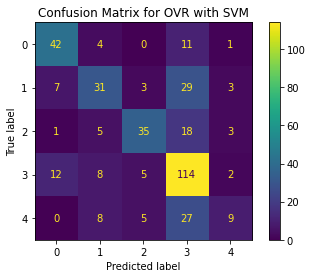

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_ovr, x_test_flatten, y_test)
plt.title("Confusion Matrix for OVR with SVM")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


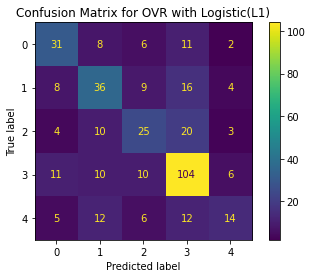

In [31]:
plot_confusion_matrix(log_l1, x_test_flatten, y_test)
plt.title("Confusion Matrix for OVR with Logistic(L1)")
plt.show()


OVO Classifier


In [32]:
# ovo = OneVsOneClassifier(LinearSVC(random_state=0)).fit(x_train_flatten,y_train)

In [33]:
# y_pred_ovo = ovo.predict(x_test_flatten)
# print("OVO model analysis")
# print(classification_report(y_test, y_pred_ovo))

Naive Bayes Classifier


In [34]:
from sklearn.naive_bayes import  GaussianNB

gaus_model = GaussianNB()

gaus_model.fit(x_train_flatten,y_train)

GaussianNB()

In [36]:
y_pred_gaus = gaus_model.predict(x_test_flatten)
print("Gaussian Model Analysis")
print(classification_report(y_test,y_pred_gaus))

Gaussian Model Analysis
              precision    recall  f1-score   support

           0       0.31      0.26      0.28        58
           1       0.50      0.15      0.23        73
           2       0.35      0.15      0.20        62
           3       0.46      0.88      0.60       141
           4       0.29      0.10      0.15        49

    accuracy                           0.43       383
   macro avg       0.38      0.31      0.29       383
weighted avg       0.41      0.43      0.36       383



In [37]:
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score,log_loss,confusion_matrix

In [41]:
def metric(y_pred, y_test,addComment):
    precisionScore= precision_score(y_test, y_pred, average='macro')
    recallScore = recall_score(y_test, y_pred, average='macro')
    f1Score = f1_score(y_test, y_pred, average='macro')
    accuracyScore= accuracy_score(y_test, y_pred)
    print("precisionScore",addComment,":",precisionScore,"recallScore",addComment,":",recallScore,"f1Score",addComment,":",f1Score,"accuracyScore",addComment,":",accuracyScore)

In [42]:
metric(y_pred_gaus,y_test,"Naive Bayes")

precisionScore Naive Bayes : 0.38147209698863815 recallScore Naive Bayes : 0.30718807038492163 f1Score Naive Bayes : 0.2945782867970432 accuracyScore Naive Bayes : 0.4281984334203655


In [72]:
metric(y_pred_svcOVR,y_test,"SVM with OVR")

precisionScore SVM with OVR : 0.606604354336969 recallScore SVM with OVR : 0.5410991403997888 f1Score SVM with OVR : 0.5512457486228848 accuracyScore SVM with OVR : 0.6031331592689295


In [75]:
metric(y_pred_svm,y_test,"SVM")

precisionScore SVM : 0.6229783388281567 recallScore SVM : 0.5049622792768024 f1Score SVM : 0.5287219624417246 accuracyScore SVM : 0.5822454308093995


In [47]:
metric(y_pred_rfOvr,y_test,"RF with OVR")

precisionScore RF with OVR : 0.7007501944439748 recallScore RF with OVR : 0.3807904924276286 f1Score RF with OVR : 0.38310905024723524 accuracyScore RF with OVR : 0.5117493472584856


In [48]:
metric(y_pred_rf,y_test,"RF")

precisionScore RF : 0.6119986582801457 recallScore RF : 0.4009836295420482 f1Score RF : 0.40480375899352267 accuracyScore RF : 0.5195822454308094


In [49]:
metric(y_pred_log_l2,y_test,"Logistic with L2")

precisionScore Logistic with L2 : 0.4688117091242091 recallScore Logistic with L2 : 0.4718349700046388 f1Score Logistic with L2 : 0.4649380158836515 accuracyScore Logistic with L2 : 0.5013054830287206


In [51]:
metric(y_pred_log_l1,y_test,"Logistic with L1")

precisionScore Logistic with L1 : 0.5132663882548105 recallScore Logistic with L1 : 0.49083243764007295 f1Score Logistic with L1 : 0.49600994105481344 accuracyScore Logistic with L1 : 0.5483028720626631


In [56]:
metric(y_pred,y_test,"Logistic")

precisionScore Logistic : 0.4712822270685586 recallScore Logistic : 0.4725153572393081 f1Score Logistic : 0.46708056440973944 accuracyScore Logistic : 0.5065274151436031
